In [45]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt


uppcig = pd.read_csv(r"C:\Users\mhand\Documents\D S D M\Econ_DM\ProblemSet5\upccig.csv", encoding='latin-1')
wcig = pd.read_csv(r"C:\Users\mhand\Documents\D S D M\Econ_DM\ProblemSet5\wcig.csv")

C:\Users\mhand\AppData\Local\Temp\ipykernel_43452\3288216554.py:8: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  wcig = pd.read_csv(r"C:\Users\mhand\Documents\D S D M\Econ_DM\ProblemSet5\wcig.csv")


In [193]:
df = pd.merge(uppcig, wcig, on='UPC', how='inner')

In [174]:
len(df) - df.SALE.isna().sum() #only 21 rows SALE, not much we can do with that

5

In [177]:
# select most profitable stores
store_winners = df.groupby("STORE")["PROFIT"].sum().sort_values(ascending=False)[:5].index
# subset
df = df[df['STORE'].isin(store_winners)]

In [178]:
condition_fourth = (df['OK'] == 1) & (df['PRICE'] > 0) & (df['SIZE'].isin(['1 CT', '4 CT', '5 CT', '10 CT', '50 CT']))
# & (df['WEEK'].isin([7, 11, 15, 16, 23, 28, 37, 42, 51, 59, 63,
#                                                                             67, 68, 75, 81, 89, 95, 103, 112, 116, 119,
#                                                                             120, 128, 133, 141, 147, 156, 164, 168, 172,
#                                                                             173, 180, 185, 194, 199, 208, 216, 220, 224, 
#                                                                             225, 232, 238, 246, 251, 260, 268, 272, 276, 
#                                                                             277, 284, 289, 298, 303, 312, 320, 324, 328, 
#                                                                             329, 336, 341, 350, 356, 364, 372, 377, 380, 
#                                                                             381, 389, 393])) 
df4 = df.loc[condition_fourth]

In [179]:
eventweek_list = [7, 11, 15, 16, 23, 28, 37, 42, 51, 59, 63, 67, 68, 75, 81, 89, 95, 103, 112, 116, 119,
                  120, 128, 133, 141, 147, 156, 164, 168, 172, 173, 180, 185, 194, 199, 208, 216, 220, 224,
                  225, 232, 238, 246, 251, 260, 268, 272, 276, 277, 284, 289, 298, 303, 312, 320, 324, 328, 
                  329, 336, 341, 350, 356, 364, 372, 377, 380, 381, 389, 393]
df4['EVENTWEEK'] = df4['WEEK'].apply(lambda x: 1 if x in eventweek_list else 0)

C:\Users\mhand\AppData\Local\Temp\ipykernel_43452\3427822215.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4['EVENTWEEK'] = df4['WEEK'].apply(lambda x: 1 if x in eventweek_list else 0)


In [180]:
df4

,COM_CODE,UPC,DESCRIP,SIZE,CASE,NITEM,STORE,WEEK,MOVE,QTY,PRICE,SALE,PROFIT,OK,PRICE_HEX,PROFIT_HEX,EVENTWEEK
461,700,190,KING CARTON CIGS (PL,1 CT,1,86040,84,199,1,1,21.51,NaN,50.48,1,4035828F5C28F5C3,40493D70A3D70A3D,1
1151,700,190,KING CARTON CIGS (PL,1 CT,1,86040,112,191,1,1,5.99,S,-77.79,1,4017F5C28F5C28F6,C053728F5C28F5C3,0
1161,700,190,KING CARTON CIGS (PL,1 CT,1,86040,112,201,2,1,5.99,S,-77.79,1,4017F5C28F5C28F6,C053728F5C28F5C3,0
1313,700,190,KING CARTON CIGS (PL,1 CT,1,86040,122,187,4,1,5.49,S,-93.98,1,4015F5C28F5C28F6,C0577EB851EB851F,0
1718,700,190,KING CARTON CIGS (PL,1 CT,1,86040,131,190,1,1,5.99,S,-77.79,1,4017F5C28F5C28F6,C053728F5C28F5C3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5395578,700,8030070413,100'S CARTON CIGARET,10 CT,1,86210,131,277,1,1,21.15,NaN,48.22,1,4035266666666666,40481C28F5C28F5C,1
5395579,700,8030070413,100'S CARTON CIGARET,10 CT,1,86210,131,278,1,1,21.15,NaN,48.22,1,4035266666666666,40481C28F5C28F5C,0
5395580,700,8030070413,100'S CARTON CIGARET,10 CT,1,86210,131,279,1,1,21.15,NaN,48.22,1,4035266666666666,40481C28F5C28F5C,0
5396062,700,8030070713,KING CARTON,10 CT,1,86000,80,277,1,1,19.87,NaN,46.40,1,4033DEB851EB851F,4047333333333333,1


Text(0.5, 1.0, 'Movements by Store over time')

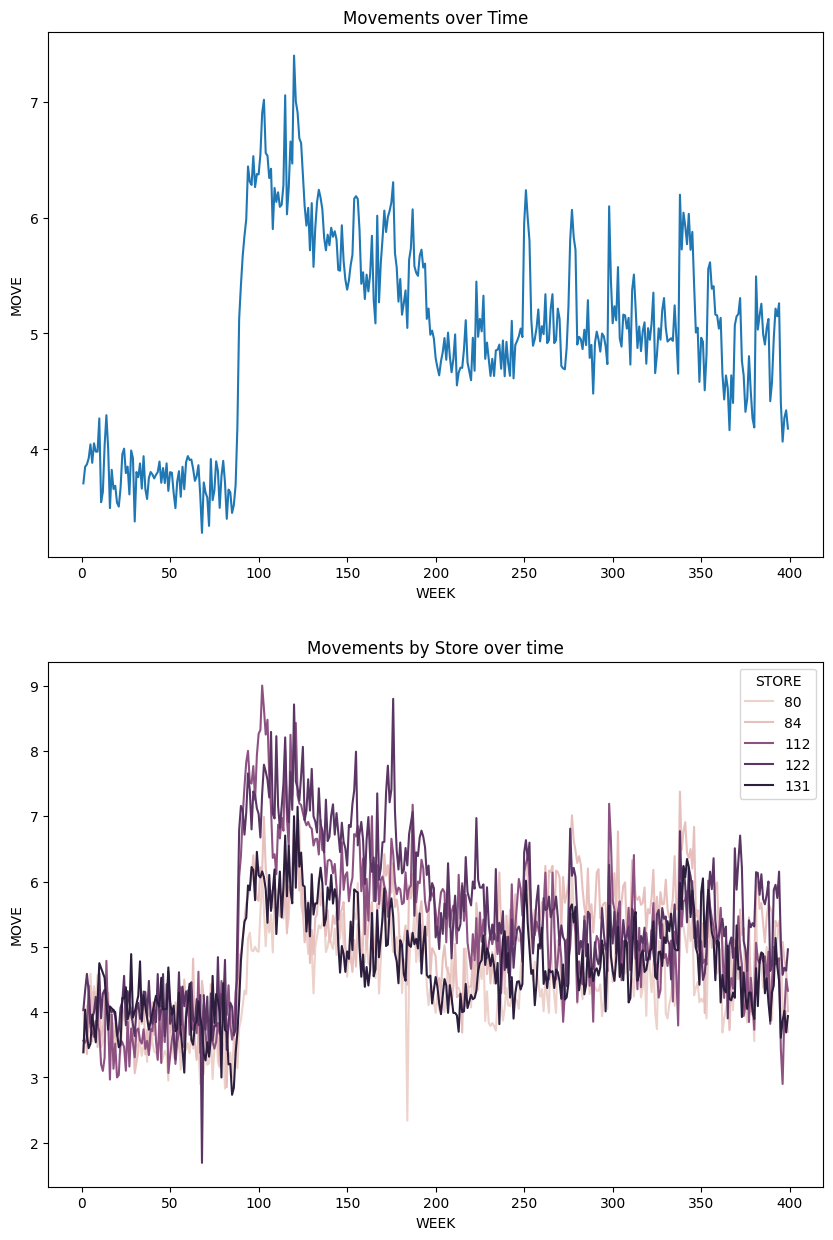

In [194]:
fig, ax = plt.subplots(2,1, figsize=(10,15))
sns.lineplot(df4, x="WEEK", y="MOVE", errorbar=None, ax=ax[0])
ax[0].set_title("Movements over Time")
sns.lineplot(df4, x="WEEK", y="MOVE", hue="STORE",errorbar=None, ax=ax[1])
ax[1].set_title("Movements by Store over time")

(0.0, 60.0)

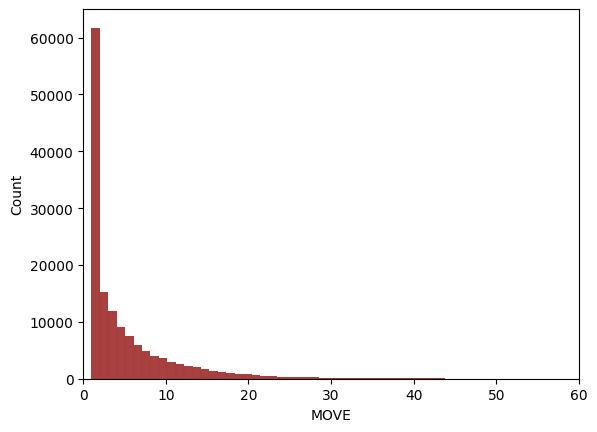

In [181]:
sns.histplot(df4, x='MOVE', bins=3000, color='darkred')
plt.ylim(0, 65000)
plt.xlim(0, 60)

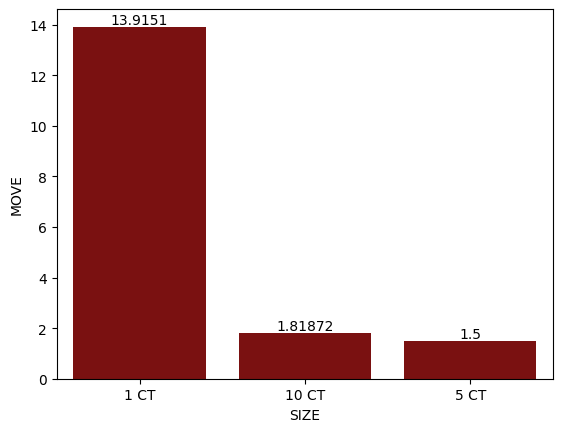

In [182]:
ax = sns.barplot(df4, x='SIZE', y='MOVE', color='darkred', errorbar=None)
for i in ax.containers:
    ax.bar_label(i,)

Text(0.5, 0, 'PRICE')

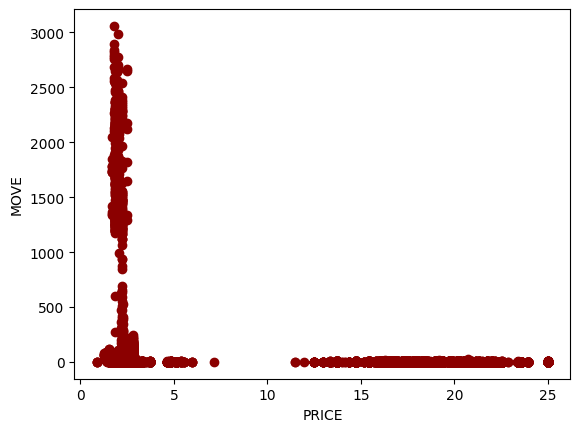

In [183]:
plt.scatter(x = df4['PRICE'], y = df4['MOVE'], color='darkred')
plt.ylabel('MOVE')
plt.xlabel('PRICE')

In [184]:

def winsorize(data, limits=(0.05, 0.05)):
    # Copy the input data to avoid modifying the original array
    winsorized_data = np.copy(data)

    # Calculate the lower and upper limits for winsorization
    lower_limit = np.percentile(winsorized_data, limits[0] * 100)
    upper_limit = np.percentile(winsorized_data, 100 - limits[1] * 100)

    print('Lower limit:', lower_limit)
    print('Upper limit:', upper_limit)

    # Replace values below the lower limit with the lower limit
    winsorized_data[winsorized_data < lower_limit] = lower_limit

    # Replace values above the upper limit with the upper limit
    winsorized_data[winsorized_data > upper_limit] = upper_limit

    return winsorized_data


move_winsorized = winsorize(df4['MOVE'], limits=(0.05, 0.05))
df4['MOVE'] = move_winsorized



Lower limit: 1.0
Upper limit: 19.0


C:\Users\mhand\AppData\Local\Temp\ipykernel_43452\3993026643.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4['MOVE'] = move_winsorized


Text(0.5, 1.0, 'MOVE by SIZE')

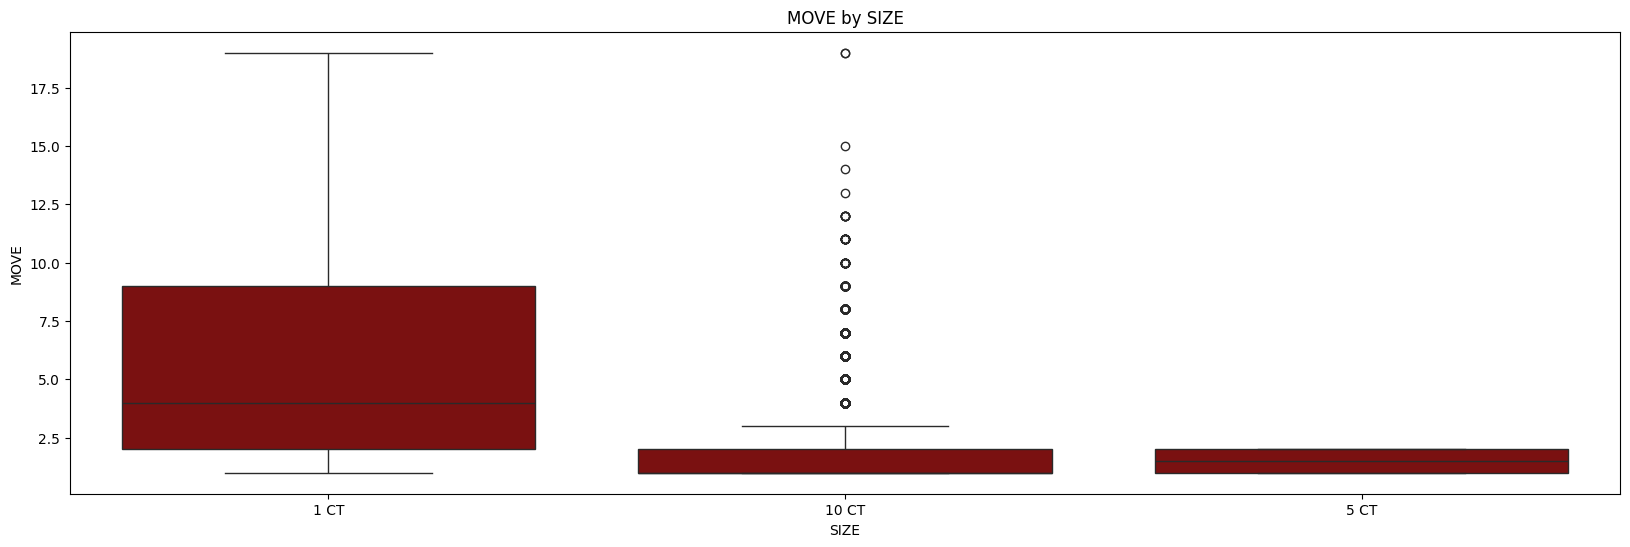

In [185]:
fig, ax = plt.subplots(figsize=(20, 6))
sns.boxplot(x='SIZE', y="MOVE", data=df4, ax=ax, color='darkred')
ax.set_title('MOVE by SIZE')

In [186]:
# UPC CODES MARLBORO PRODUCTS
# df4 = df4.loc[df['UPC'].isin([2820000156, 2820000159, 2820000270, 2820000271,
#                               2820000274, 2820000275, 2820000801, 2820000818,
#                               2820000819, 2820000821, 2820000829, 2820000848,
#                               2820000853, 2820000866, 2820000869, 2820010180,
#                               2820010190, 2820010480, 2820010530, 2820010665,
#                               2820011566, 2820011596, 2820012700, 2820012705,
#                               2820012710, 2820012740, 2820012750])]

In [187]:

encoded_df = pd.get_dummies(df4.SIZE, dtype=float)
encoded_df.columns = encoded_df.columns.str.replace(' ', '')
encoded_df.columns = encoded_df.columns.str.replace('10', 'ten')
encoded_df.columns = encoded_df.columns.str.replace('1', 'one')
encoded_df.columns = encoded_df.columns.str.replace('4', 'four')
encoded_df.columns = encoded_df.columns.str.replace('50', 'fifty')
encoded_df.columns = encoded_df.columns.str.replace('5', 'five')

df4 = pd.concat([df4, encoded_df], axis=1)
df4

,COM_CODE,UPC,DESCRIP,SIZE,CASE,NITEM,STORE,WEEK,MOVE,QTY,PRICE,SALE,PROFIT,OK,PRICE_HEX,PROFIT_HEX,EVENTWEEK,oneCT,tenCT,fiveCT
461,700,190,KING CARTON CIGS (PL,1 CT,1,86040,84,199,1,1,21.51,NaN,50.48,1,4035828F5C28F5C3,40493D70A3D70A3D,1,1.0,0.0,0.0
1151,700,190,KING CARTON CIGS (PL,1 CT,1,86040,112,191,1,1,5.99,S,-77.79,1,4017F5C28F5C28F6,C053728F5C28F5C3,0,1.0,0.0,0.0
1161,700,190,KING CARTON CIGS (PL,1 CT,1,86040,112,201,2,1,5.99,S,-77.79,1,4017F5C28F5C28F6,C053728F5C28F5C3,0,1.0,0.0,0.0
1313,700,190,KING CARTON CIGS (PL,1 CT,1,86040,122,187,4,1,5.49,S,-93.98,1,4015F5C28F5C28F6,C0577EB851EB851F,0,1.0,0.0,0.0
1718,700,190,KING CARTON CIGS (PL,1 CT,1,86040,131,190,1,1,5.99,S,-77.79,1,4017F5C28F5C28F6,C053728F5C28F5C3,0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5395578,700,8030070413,100'S CARTON CIGARET,10 CT,1,86210,131,277,1,1,21.15,NaN,48.22,1,4035266666666666,40481C28F5C28F5C,1,0.0,1.0,0.0
5395579,700,8030070413,100'S CARTON CIGARET,10 CT,1,86210,131,278,1,1,21.15,NaN,48.22,1,4035266666666666,40481C28F5C28F5C,0,0.0,1.0,0.0
5395580,700,8030070413,100'S CARTON CIGARET,10 CT,1,86210,131,279,1,1,21.15,NaN,48.22,1,4035266666666666,40481C28F5C28F5C,0,0.0,1.0,0.0
5396062,700,8030070713,KING CARTON,10 CT,1,86000,80,277,1,1,19.87,NaN,46.40,1,4033DEB851EB851F,4047333333333333,1,0.0,1.0,0.0


In [191]:
import statsmodels.api as sm
from stargazer.stargazer import Stargazer

# I try the first regression model
#regresion model with the statsmodels package
model = sm.OLS.from_formula('MOVE ~ PRICE + EVENTWEEK + fiveCT + tenCT', data=df4).fit()
#output with stargazer package
show_model = Stargazer([model])
show_model

In [192]:
X = df4[['PRICE', 'fiveCT', 'tenCT', 'EVENTWEEK']]
y = df4['MOVE']
y_pred = model.predict(X)
mse = np.mean((y - y_pred) ** 2)
rmse = mse ** 0.5
rmse

4.706265765952661